# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

### Question 1 

_Describe the techniques used to preprocess the data._


**Answer:** First I converted the images to gray and flattened the image from 32 by 32 pixels to 1024 pixels. Then the data was normalized to the formula value = 0.1 + ((image_data- min)*(b-a))/(max-min). 

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import matplotlib.image as mpimg
import cv2
from IPython.display import Image
%matplotlib inline

In [2]:
im_0 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/Y.jpg')
im_1 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/GC.jpg')
im_2 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/S2.jpg')
im_3 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/S3.jpg')
im_4 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/DC.jpg')
im_5 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/NE.jpg')
im_6 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/SL.jpg')
im_7 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/NP.jpg')
im_8 = mpimg.imread('/Users/sd1/Desktop/UDA_SDC/P2_1/WAC.jpg')

In [3]:
print(image1.shape)
my_test_X = np.array([im_0, im_1, im_2, im_3, im_4, im_5, im_6, im_7, im_8])
my_test_y = np.array([ 13, 18, 14, 14, 21, 17, 2, 9, 31])
my_test_y2 = my_test_y 


(32, 32, 3)


In [4]:
# Load pickled data
import pickle
from PIL import Image


# TODO: fill this in based on where you saved the training and testing data

training_file = "/Users/sd1/Desktop/UDA_SDC/P2_1/train.p"

testing_file = "/Users/sd1/Desktop/UDA_SDC/P2_1/test.p"

with open(training_file, mode='rb') as f:

    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']

X_test, y_test = test['features'], test['labels']

y_train2 =y_train

#y_test2 is used later for image labeling
y_test2 = y_test


In [5]:

def rbg_to_gray(array):
    
        #fs for features

        fs = []

        for i in range(0,array.shape[0]):

            image = array[i]

            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            fs.append(gray_image)
            
        return np.array(fs)


X_train = rbg_to_gray(X_train)

X_test = rbg_to_gray(X_test)

my_test_X =rbg_to_gray(my_test_X)

print (X_train.shape)


X_train2=X_train

X_test2=X_test

my_test_X2=my_test_X


(39209, 32, 32)


In [6]:
img_size = 32

img_size_flat = img_size * img_size

img_shape = (img_size, img_size)

num_channels = 1

num_classes = 43


In [7]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### Visualization of 9 Random Training Images.

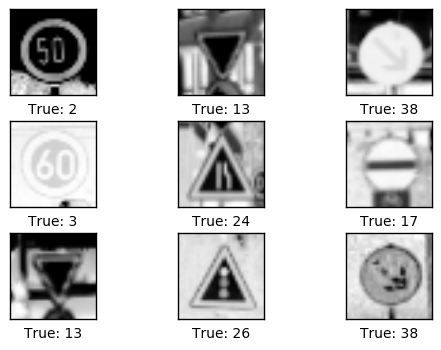

In [8]:
idx = np.random.choice(X_train.shape[0], size=9, replace=False)
images = X_train[idx,:]
# Get the true classes for those images.
cls_true = y_train[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Visualization of Nine Random Test Images

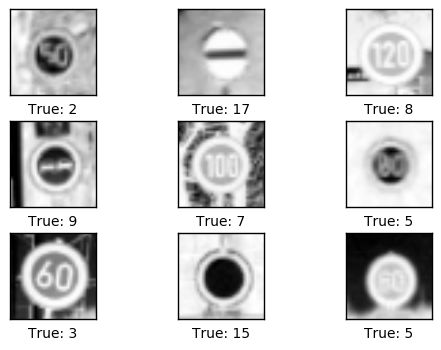

In [9]:
idx = np.random.choice(X_test.shape[0], size=9, replace=False)
images = X_test[idx,:]
# Get the true classes for those images.
cls_true = y_test[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Visualization of my_test Images.

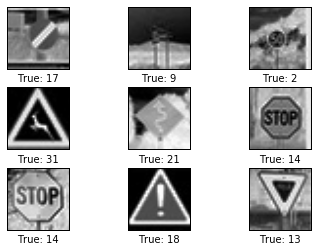

In [10]:
#Random selection of 9 images from my_test_X.
idx = np.random.choice(my_test_X.shape[0], size=9, replace=False)
images = my_test_X[idx,:]
# Get the true classes for those images.
cls_true = my_test_y[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### Data Counts

In [11]:
### To start off let's do a basic data summary.

n_train = X_train.shape[0]

n_test = X_test.shape[0]

n_my_test = my_test_X.shape[0]

image_shape = X_train.shape[1:3]

n_classes = len(set(train['labels']))
n_classes2 = len(set(test['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of my_test examples =", n_my_test)
print("Image data shape =", image_shape, 32*32)
print("Number of classes =", n_classes, )


Number of training examples = 39209
Number of testing examples = 12630
Number of my_test examples = 9
Image data shape = (32, 32) 1024
Number of classes = 43


### Visualization of Count of Training Samples by Sign Type Index

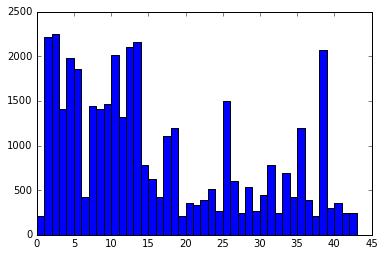

In [12]:

import matplotlib.image as mpimg
import collections
%matplotlib inline

train_label_count = collections.Counter(train['labels'])
labels, values = zip(*train_label_count.items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.show()


### Visualization of Count of Test Samples by Sign Type Index

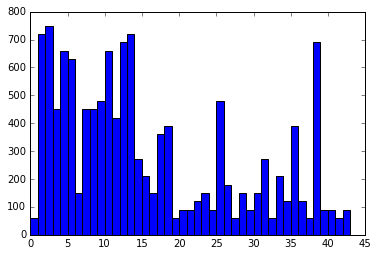

In [13]:
test_label_count = collections.Counter(test['labels'])

#print (test_label_count, type(test_label_count))
labels, values = zip(*test_label_count.items())
#print(labels, values)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [14]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import hashlib
import os
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from zipfile import ZipFile


In [15]:
import time
from datetime import timedelta
import math

In [16]:

def flatten_gray(array):
    
        #fs for features

        fs = []
        
        for i in range(0,array.shape[0]):
        
            image = array[i]

            f = np.array(image, dtype=np.float32).flatten()

            fs.append(f)

        return np.array(fs) 
    
X_train = flatten_gray(X_train)

X_test = flatten_gray(X_test)

my_test_X =flatten_gray(my_test_X)



In [17]:

def normalize_greyscale(image_data):
    
    a= 0.1
    
    b= 0.9
    
    min = 0
    
    max =255
    
    #value = 0.1 + ((image_data- min)*(b-a))/(max-min)

    greyscale_min = 0

    greyscale_max = 255

    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )

X_train = normalize_greyscale(X_train)

X_test = normalize_greyscale(X_test)

my_test_X = normalize_greyscale(my_test_X)



In [18]:

import hashlib

import os

import pickle

from urllib.request import urlretrieve

import numpy as np

from PIL import Image

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer

from sklearn.utils import resample

from tqdm import tqdm

from zipfile import ZipFile

# Turn labels into numbers and apply One-Hot Encoding

encoder = LabelBinarizer()

encoder.fit(y_train)

y_train = encoder.transform(y_train)

y_test = encoder.transform(y_test)

my_test_y = encoder.transform(my_test_y)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32

y_train = y_train.astype(np.float32)

y_test = y_test.astype(np.float32)

my_test_y = my_test_y.astype(np.float32)



### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**  I splitted the training set into a training and validation groups.

In [19]:

# Get randomized datasets for training and validation

X_train, X_valid, y_train, y_valid = train_test_split(
    
    X_train,
    
    y_train,
    
    test_size=0.15,
    
    random_state=832289)


#print('Training features and labels randomized and split.')

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The used architecture was a 'Convolutional Neural Network'. ReLu nodes were used with weight, of each layer, initialize to a small amount of noise and bias. A simple stride of 1 and padding of 0 was used here. Pooling used was max pooling over a 2 by 2 block.
The architecture two convolutional layer. The first will compute 32 features for each of the 5 by 5 patch then max pooling was applied. The second convolutional layer computed 64 features for each 5 by 5 patch and again max pooling.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [20]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [21]:
#None is the batch size
x = tf.placeholder(tf.float32, shape=[None, 1024])
y_ = tf.placeholder(tf.float32, shape=[None, 43])

In [22]:
W = tf.Variable(tf.zeros([1024,43]))
b = tf.Variable(tf.zeros([43]))

In [23]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [24]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [25]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [26]:
x_image = tf.reshape(x, [-1,32,32,1])
#x_image = tf.reshape(x, [-1,28,28,1])

In [27]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [28]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
#print(h_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#print(h_pool2)

In [29]:
W_fc1 = weight_variable([8 * 8 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [30]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [31]:
W_fc2 = weight_variable([1024, 43])
b_fc2 = bias_variable([43])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [32]:
sm=tf.nn.softmax(y_conv)
#sm=tf.nn.top_k(tf.nn.softmax(y_conv), 5, True)
#labels = tf.placeholder(tf.int32, shape=(batch_size))
#labels = tf.placeholder(tf.int32, shape=(43))
#correct = tf.nn.in_top_k(sm, labels , 1)
#eval_correct = tf.nn.in_top_k(logits, labels, 1)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.


**Answer:**  Here I used  'tf.train.GradientDescentOptimizer()' and then 'tf.train.AdamOptimizer()' optimizer function. AdamOptimizer in the convolutional neural network had the best results. 

I ended up with a batch size of 40, epochs of 5 here.

In [33]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
#loss
train_step = tf.train.AdamOptimizer(8.8e-4).minimize(cross_entropy)
#above with 40bach
#train_step = tf.train.AdamOptimizer(9e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

In [34]:
import datetime

batch_size=20#40
total_samples = X_train.shape[0]
epochs = 5

#Loops (at batch size) to get through data once.
loops = int(total_samples / batch_size) 

print("Start ",datetime.datetime.now().time())

for i in range(epochs):
    #for j in range(800):
    for j in range(loops):
      batch_start = j*batch_size
      batch_features = X_train[batch_start:(batch_start + batch_size)]
      batch_labels = y_train[batch_start:(batch_start + batch_size)] 

      if j%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch_features, y_: batch_labels, keep_prob: 1.0})
            #x: X_train[0:50], y_: y_train[0:50], keep_prob: 1.0})  
        print("step %d, training accuracy %g, batch start %d"%(j, train_accuracy, batch_start))

      train_step.run(feed_dict={x: batch_features, y_: batch_labels, keep_prob: 0.5})

    print("valid accuracy %g"%accuracy.eval(feed_dict={
        x: X_valid, y_: y_valid, keep_prob: 1.0}))

print("test accuracy %g"%accuracy.eval(feed_dict={    
    x: X_test, y_: y_test, keep_prob: 1.0}))    

print ("Finished ", datetime.datetime.now().time())


Start  12:32:05.981154
step 0, training accuracy 0.05, batch start 0
step 100, training accuracy 0.3, batch start 2000
step 200, training accuracy 0.45, batch start 4000
step 300, training accuracy 0.4, batch start 6000
step 400, training accuracy 0.8, batch start 8000
step 500, training accuracy 0.7, batch start 10000
step 600, training accuracy 0.75, batch start 12000
step 700, training accuracy 0.9, batch start 14000
step 800, training accuracy 0.9, batch start 16000
step 900, training accuracy 0.85, batch start 18000
step 1000, training accuracy 0.95, batch start 20000
step 1100, training accuracy 0.9, batch start 22000
step 1200, training accuracy 0.95, batch start 24000
step 1300, training accuracy 0.85, batch start 26000
step 1400, training accuracy 0.9, batch start 28000
step 1500, training accuracy 0.95, batch start 30000
step 1600, training accuracy 1, batch start 32000
valid accuracy 0.928426
step 0, training accuracy 0.9, batch start 0
step 100, training accuracy 0.95, batc

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:** Codes are adapted from mnist lab.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

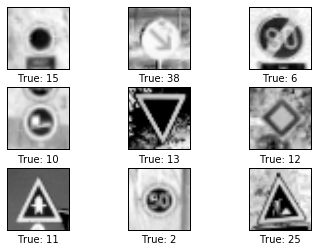

Train set sample images


In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Images were loaded above, before preprocessing.

#Random selection of 9 images from X_train.
idx = np.random.choice(X_train2.shape[0], size=9, replace=False)
images = X_train2[idx,:]
# Get the true classes for those images.
cls_true = y_train2[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

print ("Train set sample images")



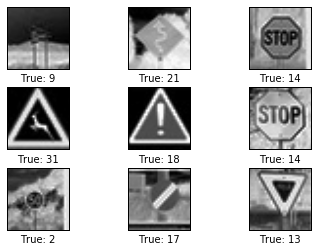

My test set sample images


In [36]:
#Random selection of 9 images from X_train.
idx = np.random.choice(my_test_X2.shape[0], size=9, replace=False)
images = my_test_X2[idx,:]
# Get the true classes for those images.
cls_true = my_test_y2[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

print ("My test set sample images")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:** Cropping may affect negitively the accuracy.

In [37]:

predictions=[]
for i in range(0,9):
    predict = np.argmax(sm.eval(feed_dict={x:my_test_X , y_: my_test_y, keep_prob: 1.0})[i])
    predictions.append(predict)
print (predictions)

[13, 18, 14, 14, 12, 32, 14, 12, 31]


In [38]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

print("my test accuracy %g"%accuracy.eval(feed_dict={
    x: my_test_X, y_: my_test_y, keep_prob: 1.0}))

for i in range(0,len(my_test_y)):
    flag =""
    #predict = np.argmax(sm.eval(feed_dict={x:my_test_X , y_: my_test_y, keep_prob: 0.5})[i])
    predict = predictions[i]    
    true = np.argmax(my_test_y[i])
    if (predict == true):
        flag = True
    print ("My test prediction for image %d is: %d. The true value is: %d  %s"%(i,predict,true,flag))


my test accuracy 0.555556
My test prediction for image 0 is: 13. The true value is: 13  True
My test prediction for image 1 is: 18. The true value is: 18  True
My test prediction for image 2 is: 14. The true value is: 14  True
My test prediction for image 3 is: 14. The true value is: 14  True
My test prediction for image 4 is: 12. The true value is: 21  
My test prediction for image 5 is: 32. The true value is: 17  
My test prediction for image 6 is: 14. The true value is: 2  
My test prediction for image 7 is: 12. The true value is: 9  
My test prediction for image 8 is: 31. The true value is: 31  True


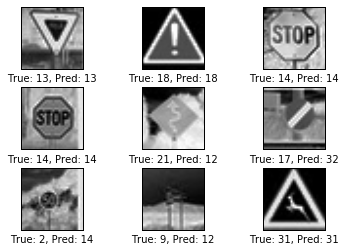

In [39]:
#idx = np.random.choice(my_test_X.shape[0], size=9, replace=False)
idx = list(range(0, 9))
images = my_test_X[idx,:]
# Get the true classes for those images.
cls_true = my_test_y2[idx]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, cls_pred=predictions )

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:** The model is okay but not accurate in significance.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:** NA

In [40]:
smp = sm.eval(feed_dict={x:my_test_X , y_: my_test_y, keep_prob: 1.0})[8]
smpL = list(smp)
indexes = list(range(43))

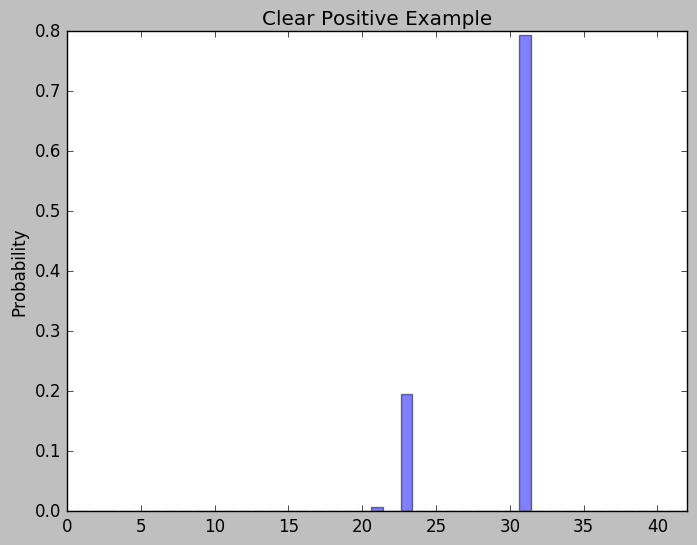

In [41]:

import matplotlib.pyplot as plt; plt.rcdefaults()

plt.bar(indexes, smpL, align='center', alpha=0.5)
plt.xlim(0,42)
#plt.xticks(, objects)
plt.ylabel('Probability')
plt.title('Clear Positive Example')
 
plt.show()


Above is a 'WAC (Wild Animal Crossing)' sign with a sign name index of 31 and it is clearly correct.

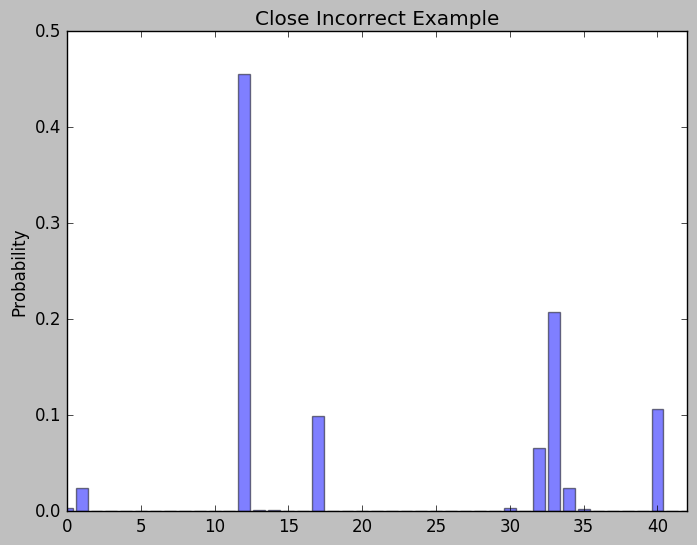

In [46]:
smp2 = sm.eval(feed_dict={x:my_test_X , y_: my_test_y, keep_prob: 1.0})[7]
smpL2 = list(smp2)
plt.bar(indexes, smpL2, align='center', alpha=0.5)
#plt.xticks(, objects)
plt.xlim(0,42)
plt.ylabel('Probability')
plt.title('Close Incorrect Example')
 
plt.show()

The above is a 'No passing' that has a index of 9. The index 9 is not the one with 
the highest probability and appears to have a 0 probability. Most others are clearly correct of clearly in correct.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:** NA